# Parker Solar Probe Examples

In [1]:
from utils.io import load_psp_data, time_stamp
from pytplot import tplot, tlimit, timebar
import pytplot
from utils.config import PSPConfig

11-May-24 14:41:22: Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConnectionPool(host='sciqlop.lpp.polytechnique.fr', port=80): Read timed out. (read timeout=1)")': /cache/get_inventory?provider=ssc
11-May-24 14:41:25: Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConnectionPool(host='sciqlop.lpp.polytechnique.fr', port=80): Read timed out. (read timeout=1)")': /cache/get_inventory?provider=ssc
11-May-24 14:41:30: Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConnectionPool(host='sciqlop.lpp.polytechnique.fr', port=80): Read timed out. (read timeout=1)")': /cache/get_inventory?provider=ssc
11-May-24 14:41:39: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConne

In [2]:
tnames = load_psp_data()

0 : psp_fld_l2_mag_RTN_4_Sa_per_Cyc
1 : psp_swp_spi_sf00_L3_DENS
2 : psp_swp_spi_sf00_L3_VEL_RTN_SUN
3 : psp_swp_spi_sf00_L3_VEL_RTN
4 : psp_swp_spi_af00_L3_DENS
5 : psp_swp_spi_af00_L3_VEL_RTN_SUN
6 : psp_swp_spi_af00_L3_VEL_RTN
7 : Tp_spani_b
8 : Tp_spanib_b


In [20]:
import polars as pl
  
def find_events(df: pl.DataFrame):
    return df.with_columns(
        Λ_t = 1 - (pl.col("v.ion.change.l") / pl.col("v.Alfven.change.l")) ** 2
    ).with_columns(
        rate =  (pl.col("Λ_ion") / pl.col("Λ_t") - 1).abs()
    ).sort("rate")
    
p_conf = PSPConfig(enc=7).load()
events = find_events(p_conf.events).head(2)

In [21]:
def plot_event(event, tnames2plot, td_stop_c = "t.d_end", add_timebars = True):
    tstart = time_stamp(event["tstart"])
    tstop = time_stamp(event["tstop"])
    td_start = event["t.d_start"]
    td_stop = event[td_stop_c]
    
    tlimit([tstart,tstop])

    if add_timebars:
        timebar(time_stamp(td_start))
        timebar(time_stamp(td_stop))

    return tplot(tnames2plot, return_plot_objects=True)

In [22]:
from discontinuitypy.utils.plot import plot_candidate
from pytplot import get_data

def plot_candidate_tplot(event, name= 'psp_fld_l2_mag_RTN_4_Sa_per_Cyc'):
    da = get_data(name, xarray=True)
    return plot_candidate(event, da)

In [23]:
tnames2plot = [
    'psp_fld_l2_mag_RTN_4_Sa_per_Cyc',
    'psp_swp_spi_sf00_L3_DENS',
    'psp_swp_spi_sf00_L3_VEL_RTN_SUN',
    'Tp_spani_b'
]

In [24]:
from great_tables import GT

GT(events.select("tstart", "tstop", "Λ_t", "Λ_ion")).fmt_datetime(
    columns=["tstart", "tstop"]
).fmt_number(columns=["Λ_t", "Λ_ion"], decimals=2)

tstart,tstop,Λ_t,Λ_ion
2021-01-17 13:22:56,2021-01-17 13:23:12,0.90,0.74
2021-01-17 14:00:40,2021-01-17 14:00:56,0.46,0.57


In [25]:
fig

NameError: name 'fig' is not defined

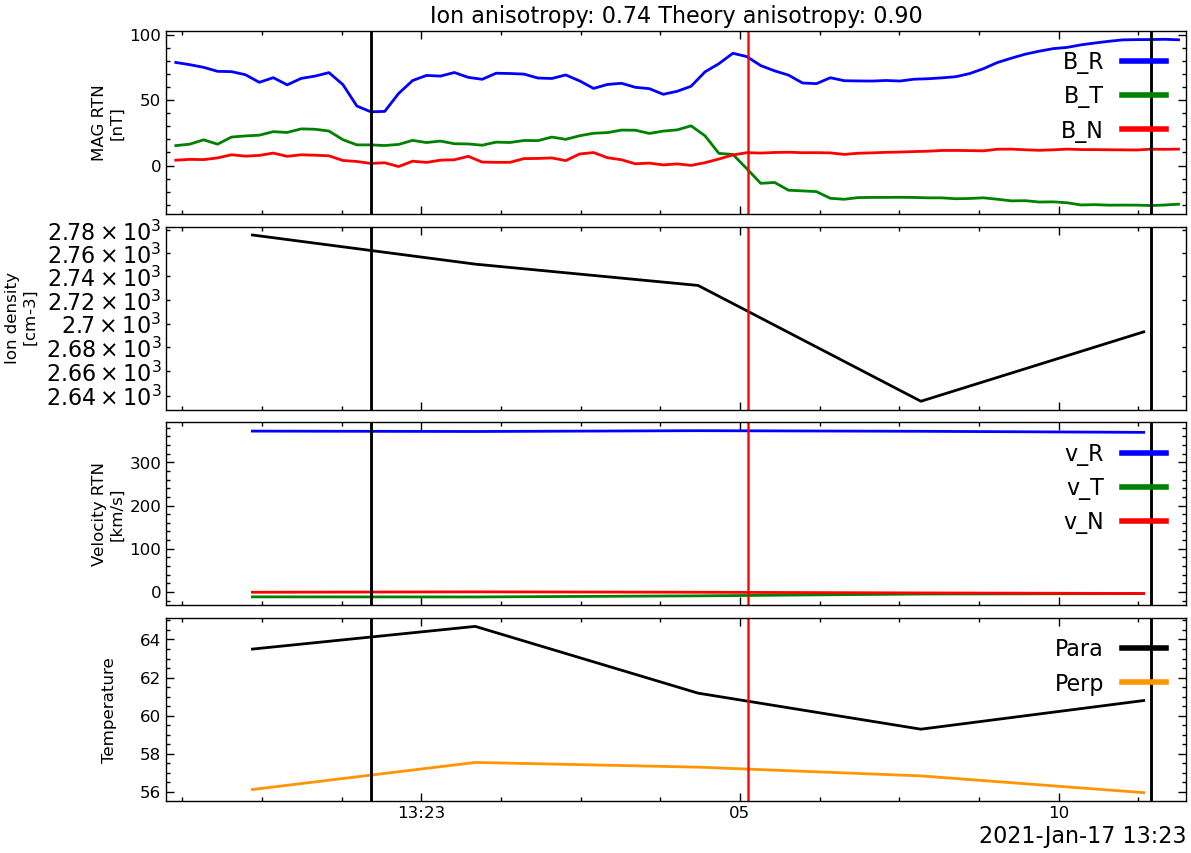

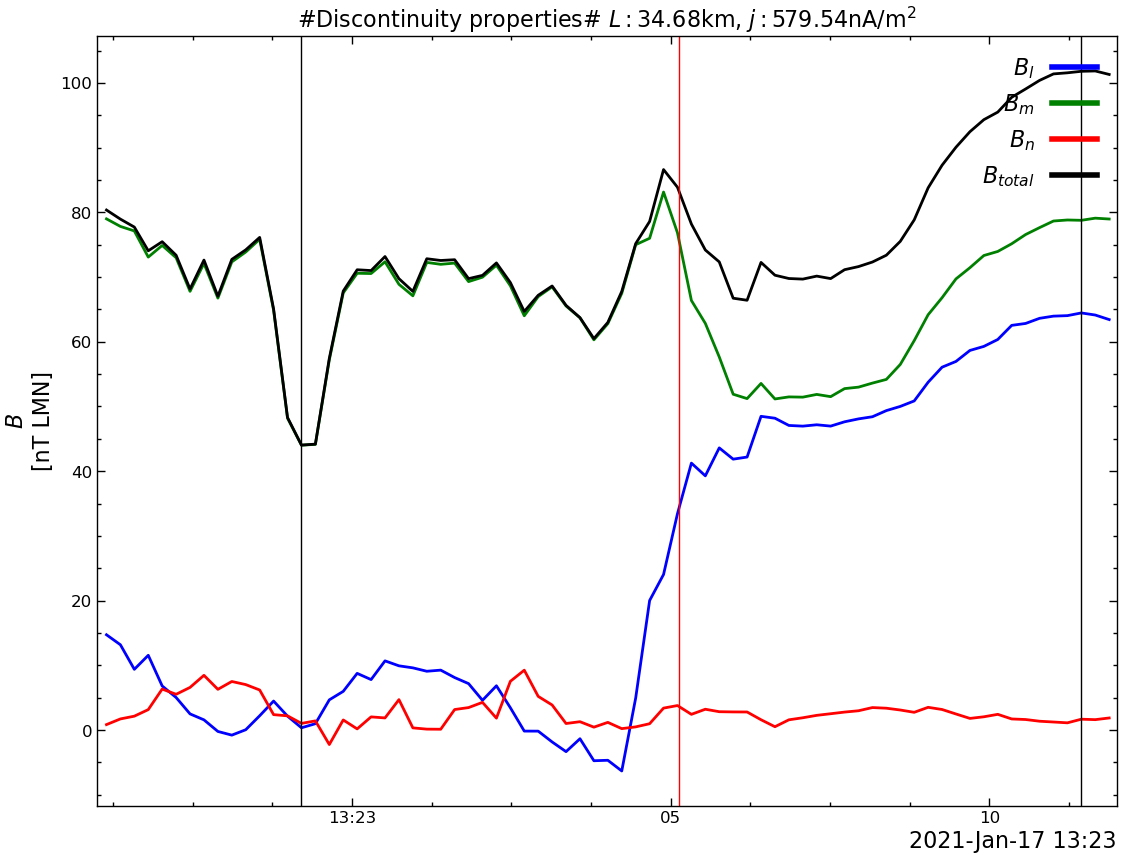

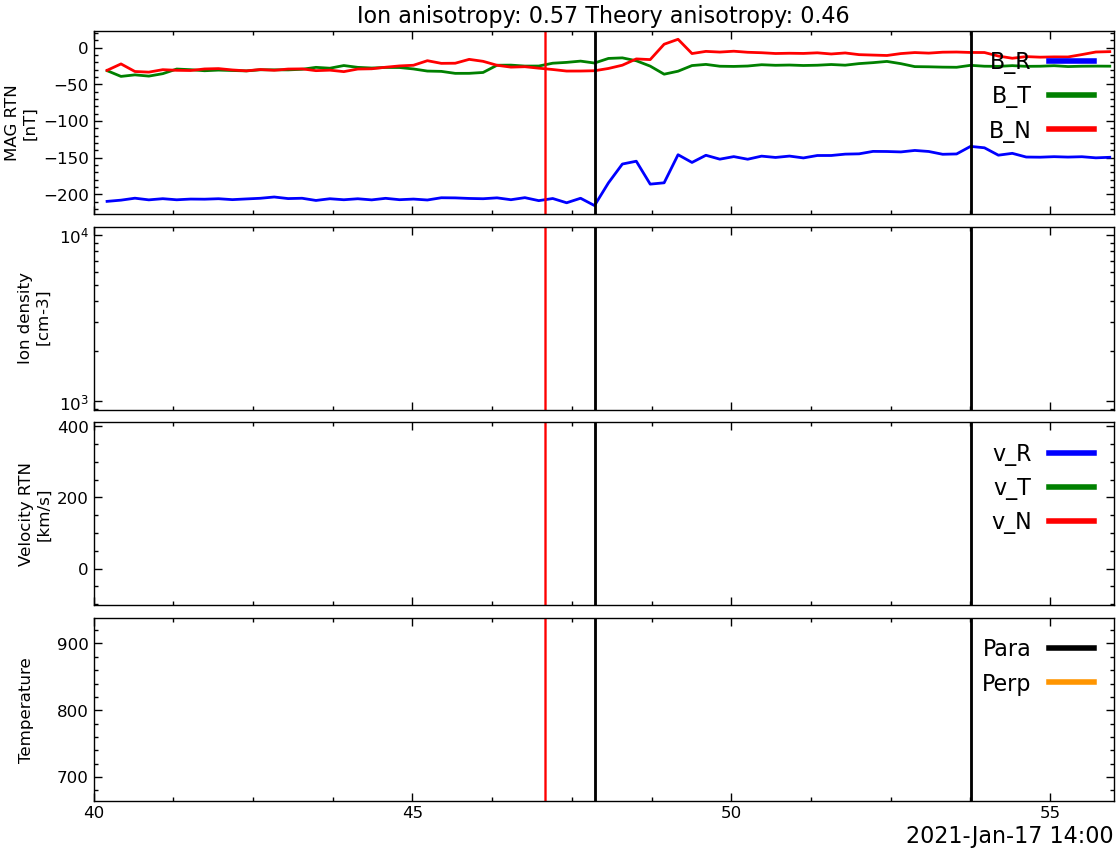

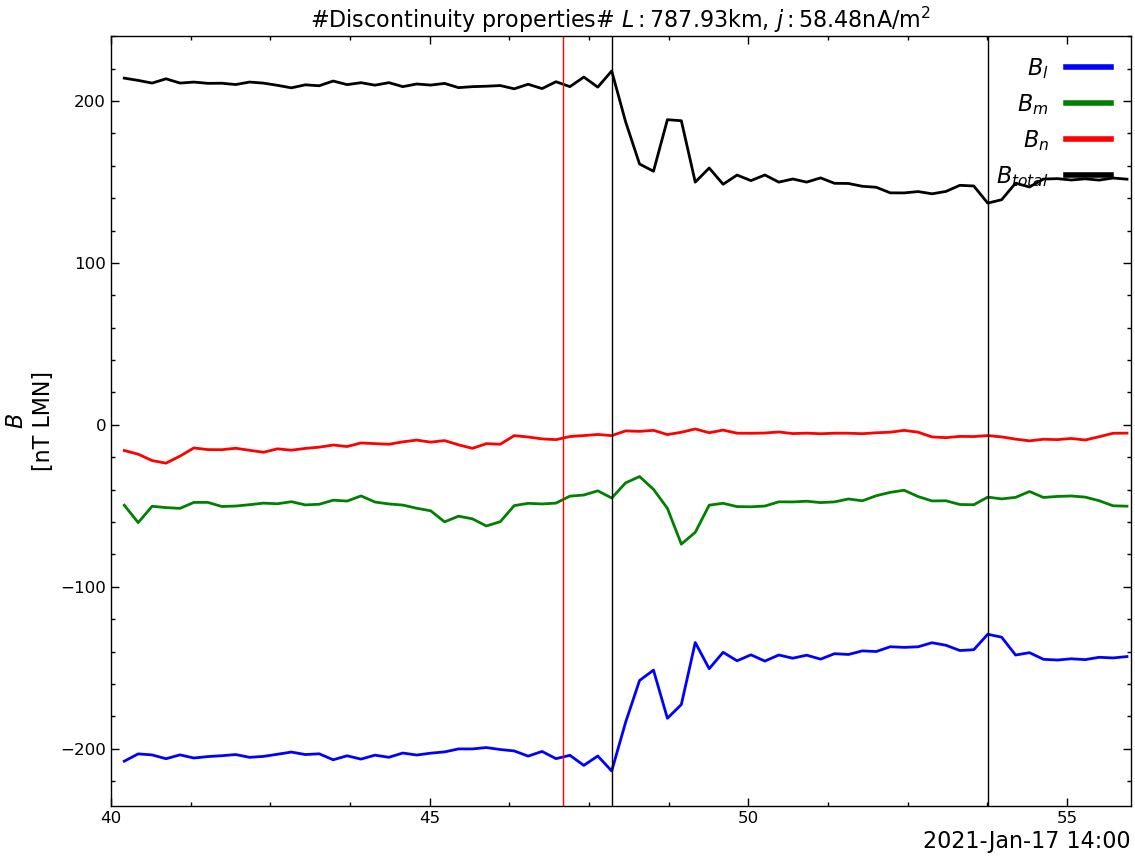

In [28]:
#| layout-ncol: 2
#| column: page
pytplot.tplot_options('ysize', 10)

title = "Ion anisotropy: {:.2f} Theory anisotropy: {:.2f}"

for event in events.rows(named=True):
    fig, axs = plot_event(event, tnames2plot)
    axs[0].set_title(title.format(event["Λ_ion"], event["Λ_t"]))
    plot_candidate_tplot(event)